In [1]:
import scanpy as sc
import os
import pandas as pd
import matplotlib as mpl
import sys
import numpy as np
import matplotlib.pyplot as plt
import diffxpy.api as de
sys.path.append('/wsfish/glioblastoma/')
#import FISHspace as sp

%reload_ext autoreload
%autoreload 2

mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.minor.pad'] = 2
mpl.rcParams['xtick.major.pad'] = 2
mpl.rcParams['ytick.minor.pad'] = 2
mpl.rcParams['ytick.major.pad'] = 2
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

# use colorblind seaborn style
plt.style.use('seaborn-colorblind')

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2024-04-24 16:29:08.283850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 16:29:14.020463: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_1261598/1368228907.py:33: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  pl

# Full Data

In [2]:
#adata_full = sc.read_h5ad('../OrganoidAnalysis/integration/GBMOrganoids_scVIsurgery.h5ad')

In [3]:
adata_full = sc.read_h5ad('../OrganoidAnalysis/integration/GBMOrganoids_scVIsurgery20240408.h5ad')

In [4]:
adata_full.X = adata_full.raw.X
sc.pp.normalize_total(adata_full, target_sum=1e4)
sc.pp.log1p(adata_full)

In [5]:
df = pd.DataFrame(data=adata_full.X.toarray(), columns=adata_full.var_names)
df['Condition'] = adata_full.obs.condition.values
df['Time'] = [t if t == '000h' or t == '144h' else '24/72h' for t in adata_full.obs.time]

In [6]:
import seaborn as sns

In [7]:
g = 'VEGFA'
# Set up the figure
def violin_plot(
    df, 
    g,
    figsize=(8,3),
    ):
    
    colors = {
        'hyp':{'24/72h':'#c44d56','144h':'#e8a7ac'},
        'pla':{'24/72h':'#90c695','144h':'#d3f2d6'},
        'hyppla':{'24/72h':'#22a7f0','144h': '#b3ddf5'},
    }

    f, axs = plt.subplots(nrows=1, ncols=4, figsize=figsize, sharey=True)

    # Plot initial condition
    vmin, vmax = df[g].min(), df[g].max()
    df['Position'] = 0
    data_initial = df[df['Condition'] == 'initial']
    v0 = sns.violinplot(data=data_initial, y=g, x='Position',color='#ecf0f1', inner='quart', ax =axs[0])
    v0.set_ylim(vmin,vmax)
    axs[0].set_title('initial')
    conditions = ['hyp', 'pla', 'hyppla']
    position = 1
    df2 = df[df['Condition'].isin(conditions)]
    for i, condition in enumerate(conditions, start=1):
        df_c = df[df['Condition'] == condition]
        df_c['Position'] = position
        position += 1
        v= sns.violinplot(data=df_c, y=g, x='Position' , split=True, hue='Time',inner="quart", ax=axs[i], palette=colors[condition])
        v.set_ylim(vmin,vmax)
        axs[i].set_title(f'{condition}')


    plt.tight_layout()
    plt.subplots_adjust(wspace=0)
    
    plt.savefig('figures/violin/{}.pdf'.format(g), dpi=300,bbox_inches='tight', transparent=True)
    plt.show()


In [38]:
df = pd.DataFrame(data=adata_full.X.toarray(), columns=adata_full.var_names)
df['Condition'] = adata_full.obs.condition.values
time_dic = {'000h':0, '024h':1, '072h':3, '144h':6}
df['Time'] = np.array([time_dic[t] for t in adata_full.obs.time.values])
df['celltype'] = adata_full.obs['annotation_20240408'].values

initial = df[df['Condition'] == 'initial']
initial1 = initial.copy()
initial2 = initial.copy()
initial3 = initial.copy()

initial1['Condition'] = 'hyp'
initial2['Condition'] = 'hyppla'
initial3['Condition'] = 'pla'


df['line'] = adata_full.obs.line.values
df = df[df['Condition'] != 'initial']
df = pd.concat([df, initial1, initial2, initial3])

In [43]:
df[(df.Time == 3) & (df.Condition == 'hyp') ]

,ABCC9,ACTA2,ADAMTS12,ADAMTS16,ADAMTS3,ADRA1A,ADRA1B,AIF1,ALAS2,ALK,...,VWC2L,WIF1,WNT1,WNT2B,ZBBX,ZDHHC23,Condition,Time,celltype,line
0,0.0,3.599698,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,hyp,3,+HYP1,SL007
1,0.0,3.634961,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,hyp,3,+HYP1,SL007
2,0.0,4.062903,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,hyp,3,rAC,SL007
3,0.0,4.108909,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,hyp,3,+HYP1,SL007
4,0.0,3.989049,0.0,0.0,2.926803,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,hyp,3,+HYP1,SL007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158993,0.0,4.704916,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,hyp,3,+HYP1,SL027A
158994,0.0,3.976987,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,hyp,3,+HYP1,SL027A
158995,0.0,4.278383,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,hyp,3,+HYP2,SL027A
158996,0.0,4.062903,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,hyp,3,+HYP1,SL027A


In [9]:
def lineplot(
    df,
    g,
    #s=2,
    figsize=(8,3),
    errorbar=('ci',50),
    estimator='mean',
    ):
    colors = {
        'hyp':'#c44d56',
        'pla':'#90c695',
        'hyppla':'#22a7f0',
    }

    f, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    
    #for l in df.line.unique():
    lplot = sns.lineplot(
        x="Time", 
        y=g, 
        #size=s,
        hue="Condition",
        estimator=estimator,
        errorbar=errorbar,
        data=df,#[df.line ==l], 
        ax=ax, 
        palette=colors,
    )

    
    #lplot.set_ylim(0,df[g].max())
    ax.set_xticks([0,1,3,6])
    ax.set_xticklabels(['0h', '24h', '72h', '144h'])
    plt.legend([],[], frameon=False)
    plt.tight_layout()
    plt.savefig('figures/lineplots/{}.pdf'.format(g), dpi=300,bbox_inches='tight', transparent=True)
    plt.show()
    

In [10]:
annotation_colors = {
    '+HYP2':'#840034',
    'preOPC': '#7befb2',
    'RG':'#ff9470',
    '+HYP1':'#C50F53',
    'AC1':'#2ecc71',
    'nIPC':'#FFF192',
    'OPC':'#89c4f4',
    'GBL':'#b9e670',
    'hAC':'#EDE8F3',
    'AC2':'#2ecc71',
    'FBL':'#9f5afd',
    'rAC':'#e3ba8f',
    'cOPC':'#038aff',
    'Unknown':'#efeff0',
}

In [112]:
def proportion_plot(
    df,
    #s=2,
    figsize=(3,5),
    ):
    
    annotation_colors = {
    '+HYP2':'#840034',
    'preOPC': '#7befb2',
    'RG':'#ff9470',
    '+HYP1':'#C50F53',
    'AC1':'#2ecc71',
    'nIPC':'#FFF192',
    'OPC':'#89c4f4',
    'GBL':'#b9e670',
    'hAC':'#EDE8F3',
    'AC2':'#2ecc71',
    'FBL':'#9f5afd',
    'rAC':'#e3ba8f',
    'cOPC':'#038aff',
    'Unknown':'#efeff0',
    }
    
    order_ = ['+HYP2','+HYP1','hAC', 'rAC', 'AC1','AC2','nIPC', 'FBL', 'cOPC','OPC','preOPC', 'GBL', 'RG','Unknown']

    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(
        3,
        1,
        height_ratios=(1,1,1),
        left=0.1,
        right=0.9,
        bottom=0.01,
        top=0.99,
        wspace=0.01,
        hspace=-.05,
    )

    ax = fig.add_subplot(gs[0, 0])
    df_ = df[df.Condition == 'hyp']
    dic_ = {}
    for ct in order_:
        P = []
        for t in [0,1,3,6]:
            df_t = df_[df_.Time == t]
            max_ = df_t.shape[0]
            P.append((df_t.celltype == ct).sum()/ max_ * 100)
        dic_[ct] = P
    
    p = np.array([0,0,0,0])
    
    zo = len(order_)
    for ct in order_:
        p = p + np.array(dic_[ct])
        ax.fill_between([0,1,3,6], p, color=annotation_colors[ct], zorder= zo)
        zo -= 1
        
    #lplot.set_ylim(0,df[g].max())
    ax.set_xticks([0,1,3,6])
    ax.set_xticklabels(['0h', '24h', '72h', '144h'])
    ax.axis('off')
    
    ax = fig.add_subplot(gs[1, 0])
    df_ = df[df.Condition == 'pla']
    dic_ = {}
    for ct in order_:
        P = []
        for t in [0,1,3,6]:
            df_t = df_[df_.Time == t]
            max_ = df_t.shape[0]
            P.append((df_t.celltype == ct).sum()/ max_ * 100)
        dic_[ct] = P
    
    p = np.array([0,0,0,0])
    
    zo = len(order_)
    for ct in order_:
        p = p + np.array(dic_[ct])
        ax.fill_between([0,1,3,6], p, color=annotation_colors[ct], zorder= zo)
        zo -= 1
        
    #lplot.set_ylim(0,df[g].max())
    ax.set_xticks([0,1,3,6])
    ax.set_xticklabels(['0h', '24h', '72h', '144h'])
    ax.axis('off')
    
    ax = fig.add_subplot(gs[2, 0])
    df_ = df[df.Condition == 'hyppla']
    dic_ = {}
    for ct in order_:
        P = []
        for t in [0,1,3,6]:
            df_t = df_[df_.Time == t]
            max_ = df_t.shape[0]
            P.append((df_t.celltype == ct).sum()/ max_ * 100)
        dic_[ct] = P
    
    p = np.array([0,0,0,0])
    
    zo = len(order_)
    for ct in order_:
        p = p + np.array(dic_[ct])
        ax.fill_between([0,1,3,6], p, color=annotation_colors[ct], zorder= zo)
        zo -= 1
        
    #lplot.set_ylim(0,df[g].max())
    ax.set_xticks([0,1,3,6])
    ax.set_xticklabels(['0h', '24h', '72h', '144h'])
    ax.axis('off')
    
    plt.legend([],[], frameon=False)
    plt.tight_layout()
    plt.savefig('figures/proportions.pdf'.format(g), dpi=300,bbox_inches='tight', transparent=True)
    plt.show()

/tmp/ipykernel_1261598/521252042.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


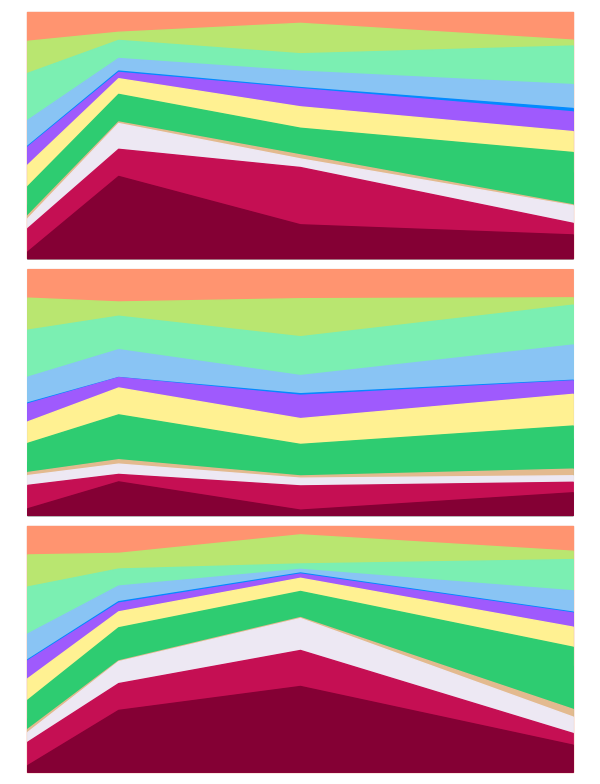

In [116]:
d = proportion_plot(
    df,
    figsize=(7.5,8),
)

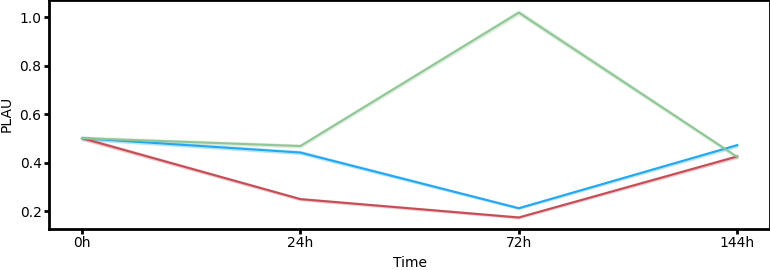

In [13]:
lineplot(
    df, 
    'PLAU',
    #errorbar=('pi',10),
    estimator='mean',
    
)

In [ ]:
lineplot(
    df, 
    'SERPINA3',
    #errorbar=('pi',10), 
    estimator='mean',
    
)

In [ ]:
lineplot(
    df, 
    'PLAU',
    #errorbar=('pi',10), 
    estimator='mean',
    
)

In [ ]:
lineplot(
    df, 
    'CD44',
    #errorbar=('pi',10), 
    estimator='mean',
    
)

In [ ]:
lineplot(
    df, 
    'VEGFA',
    #errorbar=('pi',10), 
    estimator='mean',
    
)